|Name:|Tufan Kundu|
|-|-|
|Registration no:|24MDT0184|
|Course Name:|Deep Learning Lab|
|Course Code:|PMDS603P|
|Experiment:|5|
|Date:|14 August,2025|

## Question1. Use the cifar10 dataset and do necessary pre-processing, and split the data into training, validation, and testing sets. Create a new model using a sequential class with appropriate hidden layers and output layer neurons. Choose appropriate activation functions like sigmoid and relu, etc. And also an appropriate one in the output layer. Choose the error function appropriately and use SGD as the optimizer. Include early stopping technique in your model and run the model for 500 epochs. Try to come up with a better model with decent accuracy.

### Importing the necessary libraries

In [15]:
from tensorflow import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD 
from keras.regularizers import L2
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from keras.utils import to_categorical

import warnings 
warnings.filterwarnings("ignore")

### Loading the dataset

In [16]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_subtrain,x_valid,y_subtrain,y_valid = train_test_split(x_train,y_train, test_size = 0.1, random_state = 42)


In [17]:
x_train = x_train/255
x_test = x_test/255
x_subtrain = x_subtrain/255 
x_valid = x_valid/255

In [18]:
## flattening the images 
x_subtrain_flat = x_subtrain.reshape(x_subtrain.shape[0], -1)
x_valid_flat = x_valid.reshape(x_valid.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

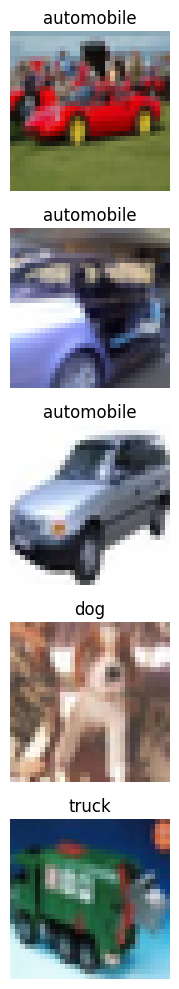

In [19]:
import numpy as np
# Mapping of label numbers to class names
label_names = {
0: "airplane",
1: "automobile",
2: "bird",
3: "cat",
4: "deer",
5: "dog",
6: "frog",
7: "horse",
8: "ship",
9: "truck"
}
# Picking 5 random indexes
random_indices = np.random.choice(len(x_train), size=5, replace=False)
# Plotting the images with labels
plt.figure(figsize=(2, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(5, 1, i+1)
    plt.imshow(x_train[idx])
    plt.title(label_names[int(y_train[idx])])
    plt.axis('off')
    plt.tight_layout()
plt.show()

### one hot encoding of target labels

In [20]:
y_subtrain_cat = to_categorical(y_subtrain, 10)
y_valid_cat = to_categorical(y_valid, 10)
y_test_cat = to_categorical(y_test, 10 )

### Building the model

In [21]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (3072,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
## SGD Optimizer 
sgd = SGD(learning_rate=0.01)

model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, mode = 'min', patience = 5, verbose = 2, restore_best_weights=True)
history = model.fit(x_subtrain_flat,y_subtrain_cat, batch_size = 128, epochs = 500, verbose = 2, validation_data=(x_valid_flat,y_valid_cat),callbacks=estop)

Epoch 1/500
352/352 - 4s - 12ms/step - accuracy: 0.1970 - loss: 2.1552 - val_accuracy: 0.2954 - val_loss: 1.9758
Epoch 2/500
352/352 - 4s - 10ms/step - accuracy: 0.2710 - loss: 1.9868 - val_accuracy: 0.3300 - val_loss: 1.8828
Epoch 3/500
352/352 - 3s - 9ms/step - accuracy: 0.3094 - loss: 1.9160 - val_accuracy: 0.3432 - val_loss: 1.8395
Epoch 4/500
352/352 - 3s - 9ms/step - accuracy: 0.3265 - loss: 1.8663 - val_accuracy: 0.3678 - val_loss: 1.7837
Epoch 5/500
352/352 - 3s - 10ms/step - accuracy: 0.3440 - loss: 1.8270 - val_accuracy: 0.3770 - val_loss: 1.7485
Epoch 6/500
352/352 - 3s - 9ms/step - accuracy: 0.3557 - loss: 1.7921 - val_accuracy: 0.3854 - val_loss: 1.7211
Epoch 7/500
352/352 - 3s - 9ms/step - accuracy: 0.3656 - loss: 1.7693 - val_accuracy: 0.3890 - val_loss: 1.7010
Epoch 8/500
352/352 - 3s - 9ms/step - accuracy: 0.3707 - loss: 1.7472 - val_accuracy: 0.3998 - val_loss: 1.6870
Epoch 9/500
352/352 - 3s - 10ms/step - accuracy: 0.3817 - loss: 1.7261 - val_accuracy: 0.3994 - val_l

In [23]:
score = model.evaluate(x_test_flat,y_test_cat,verbose = 2)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 - 1s - 3ms/step - accuracy: 0.4736 - loss: 1.4778
Test loss: 1.4778025150299072
Test Accuracy:47.36%


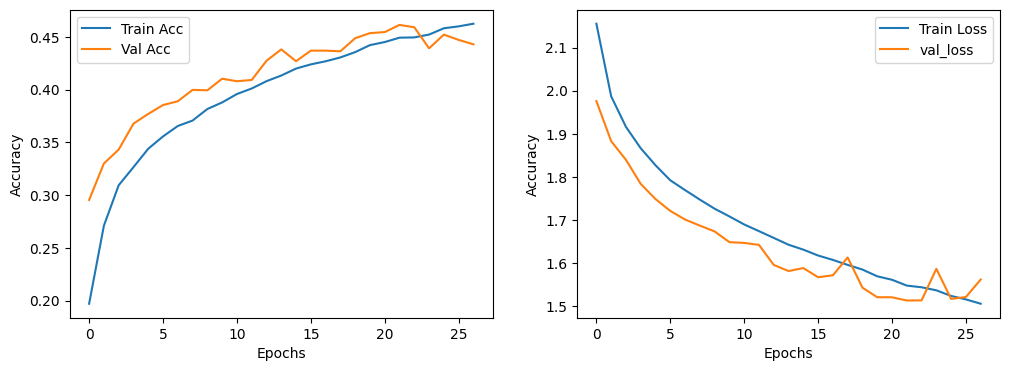

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Question 2: We will try to include some techniques for optimizing the training part. Let us see how one can include a learning rate schedule for SGD, what we discussed in the theory class. Now, first we will try to see the linear learning rate scheduler we discussed in class. here, τ is taken as 5 and ϵ0 = 0.01 and ϵτ = 0.001. If you run this code, you can see the way in which we generate the learning rate for different iterations. Compare with what we did in theory and check whether they are the same.

In [25]:
lr_schedule = keras.optimizers.schedules.PolynomialDecay(
initial_learning_rate = 0.01,
decay_steps = 5,
end_learning_rate = 0.001,
power = 1,
cycle = False
)

for steps in range(10):
    print(f"Step:{steps+1} --> LR= {lr_schedule(steps).numpy():.5f}")

Step:1 --> LR= 0.01000
Step:2 --> LR= 0.00820
Step:3 --> LR= 0.00640
Step:4 --> LR= 0.00460
Step:5 --> LR= 0.00280
Step:6 --> LR= 0.00100
Step:7 --> LR= 0.00100
Step:8 --> LR= 0.00100
Step:9 --> LR= 0.00100
Step:10 --> LR= 0.00100


In [26]:
lr_schedule = keras.optimizers.schedules.PolynomialDecay(
initial_learning_rate = 0.01,
decay_steps = 5,
end_learning_rate = 0.001,
power = 1,
cycle = True
)
for steps in range(40):
    print(f"Step:{steps+1} --> LR= {lr_schedule(steps).numpy():.5f}")

Step:1 --> LR= 0.01000
Step:2 --> LR= 0.00820
Step:3 --> LR= 0.00640
Step:4 --> LR= 0.00460
Step:5 --> LR= 0.00280
Step:6 --> LR= 0.00100
Step:7 --> LR= 0.00460
Step:8 --> LR= 0.00370
Step:9 --> LR= 0.00280
Step:10 --> LR= 0.00190
Step:11 --> LR= 0.00100
Step:12 --> LR= 0.00340
Step:13 --> LR= 0.00280
Step:14 --> LR= 0.00220
Step:15 --> LR= 0.00160
Step:16 --> LR= 0.00100
Step:17 --> LR= 0.00280
Step:18 --> LR= 0.00235
Step:19 --> LR= 0.00190
Step:20 --> LR= 0.00145
Step:21 --> LR= 0.00100
Step:22 --> LR= 0.00244
Step:23 --> LR= 0.00208
Step:24 --> LR= 0.00172
Step:25 --> LR= 0.00136
Step:26 --> LR= 0.00100
Step:27 --> LR= 0.00220
Step:28 --> LR= 0.00190
Step:29 --> LR= 0.00160
Step:30 --> LR= 0.00130
Step:31 --> LR= 0.00100
Step:32 --> LR= 0.00203
Step:33 --> LR= 0.00177
Step:34 --> LR= 0.00151
Step:35 --> LR= 0.00126
Step:36 --> LR= 0.00100
Step:37 --> LR= 0.00190
Step:38 --> LR= 0.00167
Step:39 --> LR= 0.00145
Step:40 --> LR= 0.00122


## Now, to incorporate this into the previous Question 1. You have to create a schedule and define the parameters as given below, and use it inside the SGD optimizer you are using in your previous problem.

In [27]:
lr_schedule = keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate = 0.01,
    decay_steps = 5, 
    end_learning_rate = 0.001,
    power = 1, 
    cycle = False
)

optimizers = SGD(learning_rate=lr_schedule)
model.compile(optimizer = optimizers, loss = 'categorical_crossentropy', metrics = ['accuracy'])
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, mode = 'min', patience = 5, verbose = 2, restore_best_weights=True)
history = model.fit(x_subtrain_flat,y_subtrain_cat, batch_size = 128, epochs = 500, verbose = 2, validation_data = (x_valid_flat, y_valid_cat), callbacks=estop)

Epoch 1/500
352/352 - 4s - 12ms/step - accuracy: 0.4615 - loss: 1.5135 - val_accuracy: 0.4640 - val_loss: 1.4908
Epoch 2/500
352/352 - 3s - 9ms/step - accuracy: 0.4641 - loss: 1.5059 - val_accuracy: 0.4680 - val_loss: 1.4864
Epoch 3/500
352/352 - 3s - 10ms/step - accuracy: 0.4647 - loss: 1.5069 - val_accuracy: 0.4636 - val_loss: 1.4871
Epoch 4/500
352/352 - 3s - 10ms/step - accuracy: 0.4617 - loss: 1.5067 - val_accuracy: 0.4658 - val_loss: 1.4841
Epoch 5/500
352/352 - 3s - 10ms/step - accuracy: 0.4645 - loss: 1.5034 - val_accuracy: 0.4690 - val_loss: 1.4834
Epoch 6/500
352/352 - 3s - 10ms/step - accuracy: 0.4680 - loss: 1.5004 - val_accuracy: 0.4682 - val_loss: 1.4830
Epoch 7/500
352/352 - 3s - 9ms/step - accuracy: 0.4683 - loss: 1.4988 - val_accuracy: 0.4680 - val_loss: 1.4801
Epoch 8/500
352/352 - 3s - 9ms/step - accuracy: 0.4697 - loss: 1.4971 - val_accuracy: 0.4690 - val_loss: 1.4791
Epoch 9/500
352/352 - 3s - 9ms/step - accuracy: 0.4679 - loss: 1.5000 - val_accuracy: 0.4706 - val_

In [28]:
score = model.evaluate(x_test_flat,y_test_cat,verbose = 2)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 - 1s - 3ms/step - accuracy: 0.5292 - loss: 1.3208
Test loss: 1.3208357095718384
Test Accuracy:52.92%


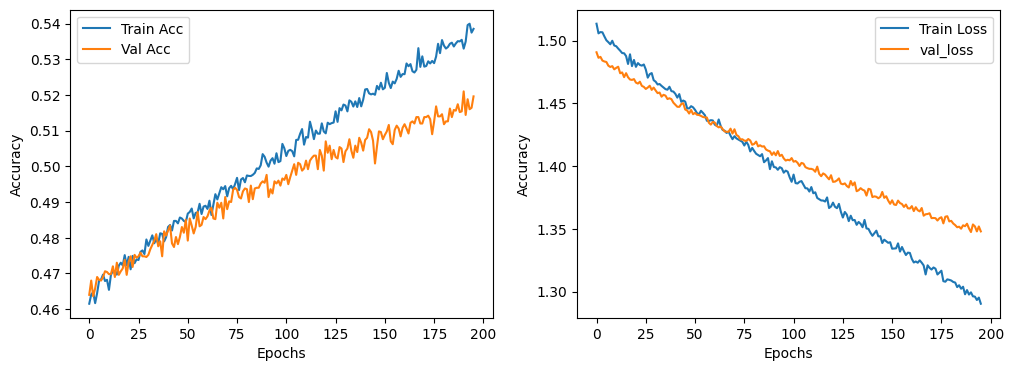

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- #### We get better accuracy with lr_schedular

## Question 3: Try cifar10 dataset classification problem with polynomialdecay with power = 2 case and see if there are any improvements.

Epoch 1/500
352/352 - 6s - 17ms/step - accuracy: 0.5344 - loss: 1.3012 - val_accuracy: 0.5118 - val_loss: 1.3539
Epoch 2/500
352/352 - 4s - 12ms/step - accuracy: 0.5381 - loss: 1.2959 - val_accuracy: 0.5226 - val_loss: 1.3497
Epoch 3/500
352/352 - 4s - 10ms/step - accuracy: 0.5353 - loss: 1.2963 - val_accuracy: 0.5164 - val_loss: 1.3484
Epoch 4/500
352/352 - 3s - 10ms/step - accuracy: 0.5399 - loss: 1.2918 - val_accuracy: 0.5166 - val_loss: 1.3493
Epoch 5/500
352/352 - 3s - 10ms/step - accuracy: 0.5358 - loss: 1.2942 - val_accuracy: 0.5166 - val_loss: 1.3498
Epoch 6/500
352/352 - 3s - 10ms/step - accuracy: 0.5355 - loss: 1.2956 - val_accuracy: 0.5122 - val_loss: 1.3505
Epoch 7/500
352/352 - 4s - 10ms/step - accuracy: 0.5384 - loss: 1.2874 - val_accuracy: 0.5154 - val_loss: 1.3484
Epoch 8/500
352/352 - 4s - 10ms/step - accuracy: 0.5397 - loss: 1.2845 - val_accuracy: 0.5156 - val_loss: 1.3463
Epoch 9/500
352/352 - 3s - 10ms/step - accuracy: 0.5376 - loss: 1.2881 - val_accuracy: 0.5172 - 

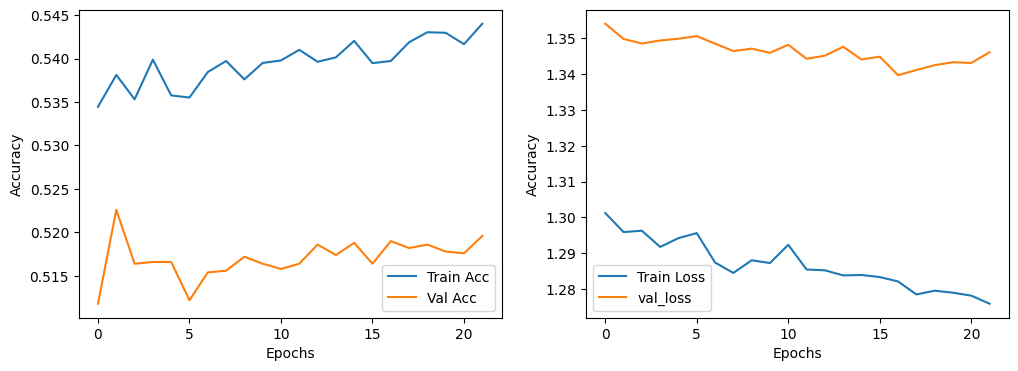

In [30]:
lr_schedule = keras.optimizers.schedules.PolynomialDecay(
initial_learning_rate = 0.01,
decay_steps = 5,
end_learning_rate = 0.001,
power = 2,
cycle = False
)
optimizer = SGD(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, mode = 'min',patience = 5, verbose = 2, restore_best_weights = True)
history = model.fit(x_subtrain_flat,y_subtrain_cat, batch_size=128, epochs =500, verbose = 2, validation_data=(x_valid_flat,y_valid_cat), callbacks=estop)
score = model.evaluate(x_test_flat,y_test_cat,verbose = 2)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- #### we get even better accuracy with polynomial decay with power 2

## Question 4: Next is an exponential decay scheduler which uses this rule for decay. The decay rate is again a hyperparameter.

In [31]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
initial_learning_rate = 0.01,
decay_steps = 10,
decay_rate = 0.96,
staircase = True # false - smooth decay, True = step-wise
)
print("Step | Learning Rate")
for step in range(0,100):
    lr_value = lr_schedule(step).numpy()
    print(f"{step} --> {lr_value}")

Step | Learning Rate
0 --> 0.009999999776482582
1 --> 0.009999999776482582
2 --> 0.009999999776482582
3 --> 0.009999999776482582
4 --> 0.009999999776482582
5 --> 0.009999999776482582
6 --> 0.009999999776482582
7 --> 0.009999999776482582
8 --> 0.009999999776482582
9 --> 0.009999999776482582
10 --> 0.009599999524652958
11 --> 0.009599999524652958
12 --> 0.009599999524652958
13 --> 0.009599999524652958
14 --> 0.009599999524652958
15 --> 0.009599999524652958
16 --> 0.009599999524652958
17 --> 0.009599999524652958
18 --> 0.009599999524652958
19 --> 0.009599999524652958
20 --> 0.009215999394655228
21 --> 0.009215999394655228
22 --> 0.009215999394655228
23 --> 0.009215999394655228
24 --> 0.009215999394655228
25 --> 0.009215999394655228
26 --> 0.009215999394655228
27 --> 0.009215999394655228
28 --> 0.009215999394655228
29 --> 0.009215999394655228
30 --> 0.00884735956788063
31 --> 0.00884735956788063
32 --> 0.00884735956788063
33 --> 0.00884735956788063
34 --> 0.00884735956788063
35 --> 0.00884

### with exponential decay in learning rate schedular

Epoch 1/500
352/352 - 6s - 16ms/step - accuracy: 0.5202 - loss: 1.3475 - val_accuracy: 0.5142 - val_loss: 1.3544
Epoch 2/500
352/352 - 4s - 11ms/step - accuracy: 0.5392 - loss: 1.2861 - val_accuracy: 0.5206 - val_loss: 1.3401
Epoch 3/500
352/352 - 4s - 10ms/step - accuracy: 0.5437 - loss: 1.2714 - val_accuracy: 0.5194 - val_loss: 1.3387
Epoch 4/500
352/352 - 4s - 10ms/step - accuracy: 0.5478 - loss: 1.2711 - val_accuracy: 0.5206 - val_loss: 1.3380
Epoch 5/500
352/352 - 4s - 10ms/step - accuracy: 0.5499 - loss: 1.2672 - val_accuracy: 0.5216 - val_loss: 1.3380
Epoch 6/500
352/352 - 4s - 10ms/step - accuracy: 0.5465 - loss: 1.2687 - val_accuracy: 0.5218 - val_loss: 1.3380
Epoch 7/500
352/352 - 4s - 10ms/step - accuracy: 0.5482 - loss: 1.2704 - val_accuracy: 0.5218 - val_loss: 1.3380
Epoch 8/500
352/352 - 4s - 10ms/step - accuracy: 0.5487 - loss: 1.2633 - val_accuracy: 0.5218 - val_loss: 1.3380
Epoch 9/500
352/352 - 4s - 10ms/step - accuracy: 0.5493 - loss: 1.2671 - val_accuracy: 0.5218 - 

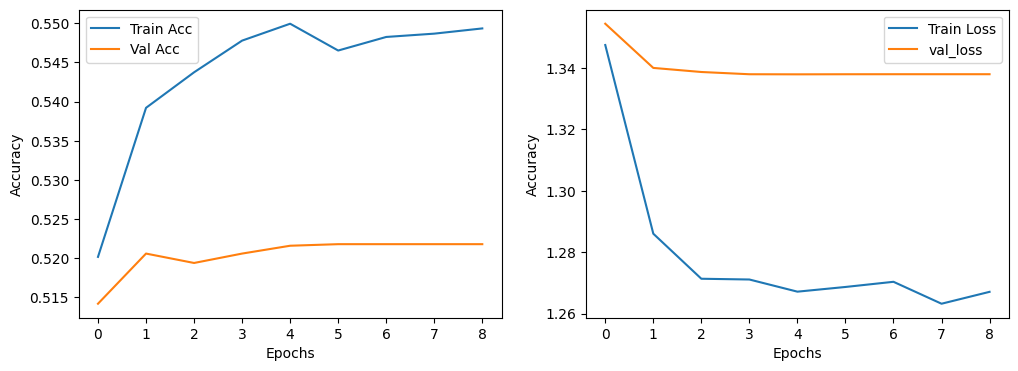

In [32]:
optimizer = SGD(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, mode = 'min',patience = 5, verbose = 2, restore_best_weights = True)
history = model.fit(x_subtrain_flat,y_subtrain_cat, batch_size=128, epochs =500, verbose = 2, validation_data=(x_valid_flat,y_valid_cat), callbacks=estop)
score = model.evaluate(x_test_flat,y_test_cat,verbose = 2)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Question 5a: We can also use ReduceLRonPlateau to deal with the training  part in a different way compared to last two types. Based on the validation loss we can decide when to reduce the learning rate if you are stuck with training part.

Epoch 1/500
352/352 - 5s - 15ms/step - accuracy: 0.4967 - loss: 1.4152 - val_accuracy: 0.5016 - val_loss: 1.3878 - learning_rate: 0.0100
Epoch 2/500
352/352 - 4s - 10ms/step - accuracy: 0.5040 - loss: 1.3856 - val_accuracy: 0.4854 - val_loss: 1.4130 - learning_rate: 0.0100
Epoch 3/500
352/352 - 4s - 10ms/step - accuracy: 0.5103 - loss: 1.3779 - val_accuracy: 0.4926 - val_loss: 1.4101 - learning_rate: 0.0100
Epoch 4/500

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
352/352 - 4s - 12ms/step - accuracy: 0.5095 - loss: 1.3711 - val_accuracy: 0.4716 - val_loss: 1.4670 - learning_rate: 0.0100
Epoch 5/500
352/352 - 4s - 11ms/step - accuracy: 0.5369 - loss: 1.3013 - val_accuracy: 0.5130 - val_loss: 1.3592 - learning_rate: 0.0050
Epoch 6/500
352/352 - 4s - 10ms/step - accuracy: 0.5378 - loss: 1.2924 - val_accuracy: 0.5158 - val_loss: 1.3577 - learning_rate: 0.0050
Epoch 7/500
352/352 - 4s - 10ms/step - accuracy: 0.5392 - loss: 1.2892 - val_accuracy: 0.5136 - val_lo

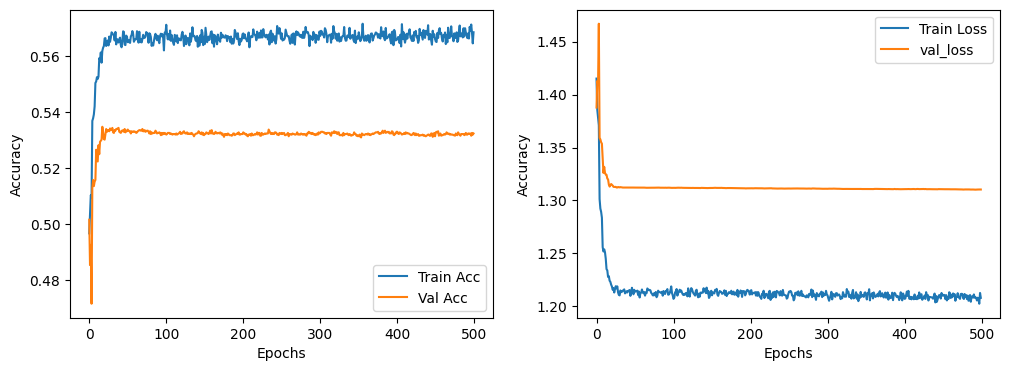

In [33]:
from keras.callbacks import ReduceLROnPlateau
optimizer = SGD(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.5,
    patience = 3,
    min_delta=0.01,
    verbose = 1,
    min_lr = 1e-5
    
)

history = model.fit(x_subtrain_flat, y_subtrain_cat, batch_size = 128, epochs = 500, verbose = 2, validation_data = (x_valid_flat, y_valid_cat), callbacks = [reduce_lr])
score = model.evaluate(x_test_flat,y_test_cat,verbose = 2)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Question 5: Now for adding momentum and nesterov momemtum you can try these in your question 1 soln and check your results in both the cases

### With classical momentum

Epoch 1/500
352/352 - 7s - 21ms/step - accuracy: 0.3191 - loss: 1.8647 - val_accuracy: 0.3552 - val_loss: 1.7741
Epoch 2/500
352/352 - 5s - 15ms/step - accuracy: 0.3354 - loss: 1.8284 - val_accuracy: 0.3752 - val_loss: 1.7025
Epoch 3/500
352/352 - 5s - 14ms/step - accuracy: 0.3603 - loss: 1.7748 - val_accuracy: 0.3934 - val_loss: 1.6874
Epoch 4/500
352/352 - 5s - 13ms/step - accuracy: 0.3740 - loss: 1.7322 - val_accuracy: 0.3972 - val_loss: 1.6578
Epoch 5/500
352/352 - 5s - 13ms/step - accuracy: 0.3892 - loss: 1.6978 - val_accuracy: 0.4202 - val_loss: 1.6247
Epoch 6/500
352/352 - 4s - 13ms/step - accuracy: 0.3912 - loss: 1.6811 - val_accuracy: 0.4104 - val_loss: 1.6270
Epoch 7/500
352/352 - 5s - 15ms/step - accuracy: 0.4012 - loss: 1.6608 - val_accuracy: 0.4312 - val_loss: 1.5849
Epoch 8/500
352/352 - 5s - 13ms/step - accuracy: 0.4089 - loss: 1.6477 - val_accuracy: 0.4402 - val_loss: 1.5507
Epoch 9/500
352/352 - 5s - 13ms/step - accuracy: 0.4181 - loss: 1.6181 - val_accuracy: 0.4444 - 

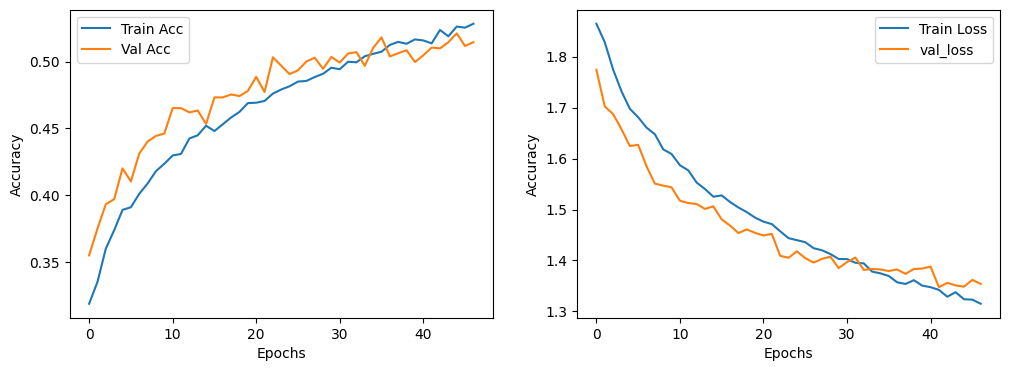

In [34]:
optimizer = SGD(learning_rate=0.01, momentum = 0.9)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy',metrics = ['accuracy'])
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, mode = 'min',patience = 5, verbose = 2, restore_best_weights = True)
history = model.fit(x_subtrain_flat,y_subtrain_cat, batch_size=128, epochs =500, verbose = 2, validation_data=(x_valid_flat,y_valid_cat), callbacks = [estop])
score = model.evaluate(x_test_flat,y_test_cat,verbose = 2)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### with nestrov_momentum

Epoch 1/500
352/352 - 9s - 26ms/step - accuracy: 0.5275 - loss: 1.3120 - val_accuracy: 0.5184 - val_loss: 1.3427
Epoch 2/500
352/352 - 6s - 16ms/step - accuracy: 0.5278 - loss: 1.3122 - val_accuracy: 0.5096 - val_loss: 1.3560
Epoch 3/500
352/352 - 6s - 16ms/step - accuracy: 0.5312 - loss: 1.2972 - val_accuracy: 0.5038 - val_loss: 1.3523
Epoch 4/500
352/352 - 6s - 17ms/step - accuracy: 0.5352 - loss: 1.2971 - val_accuracy: 0.5180 - val_loss: 1.3353
Epoch 5/500
352/352 - 5s - 14ms/step - accuracy: 0.5376 - loss: 1.2875 - val_accuracy: 0.5146 - val_loss: 1.3490
Epoch 6/500
352/352 - 5s - 15ms/step - accuracy: 0.5384 - loss: 1.2804 - val_accuracy: 0.5164 - val_loss: 1.3368
Epoch 7/500
352/352 - 5s - 14ms/step - accuracy: 0.5384 - loss: 1.2809 - val_accuracy: 0.5192 - val_loss: 1.3331
Epoch 8/500
352/352 - 5s - 14ms/step - accuracy: 0.5408 - loss: 1.2763 - val_accuracy: 0.5206 - val_loss: 1.3505
Epoch 9/500
352/352 - 5s - 14ms/step - accuracy: 0.5414 - loss: 1.2748 - val_accuracy: 0.5288 - 

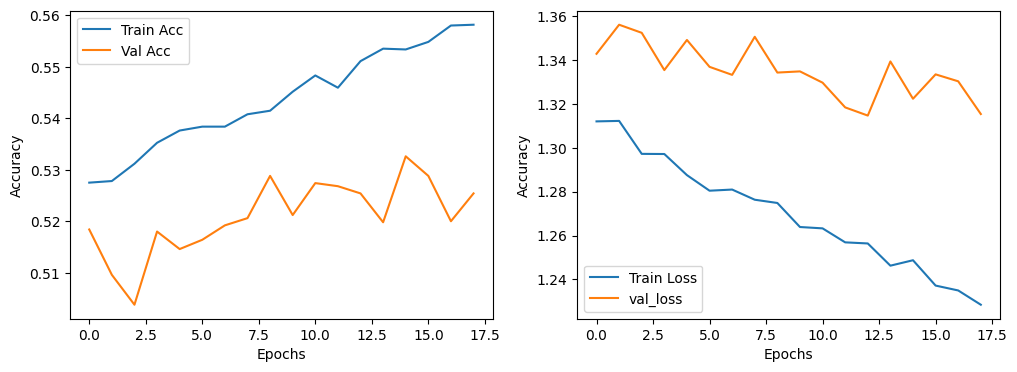

In [35]:
optimizer = SGD(learning_rate=0.01, momentum = 0.9, nesterov=True)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy',metrics = ['accuracy'])
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, mode = 'min',patience = 5, verbose = 2, restore_best_weights = True)
history = model.fit(x_subtrain_flat,y_subtrain_cat, batch_size=128, epochs =500, verbose = 2, validation_data=(x_valid_flat,y_valid_cat), callbacks = [estop])
score = model.evaluate(x_test_flat,y_test_cat,verbose = 2)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Challenging question: Try to hand-code how momentum and Nesterov momentum can be incorporated in a simple neural network model with two inputs, x1 and x2,( take random values) in the input layer and one neuron in the output layer. Note that there is no hidden layer. Use sigmoid as activation in the output layer.( use the error as mean squared error).

In [42]:
import numpy as np

## seed for reproducibility
np.random.seed(42)

## Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Derivative of sigmoid
def sigmoid_deriv(out):
    return out * (1 - out)

## MSE loss
def compute_loss(out, y):
    return np.mean((out - y) ** 2 / 2)

## Sample dataset (OR Gate dataset)
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [1]])

## Vanilla Gradient Descent
def train_vanilla(X, y, epochs=1000, lr=0.5):
    N = X.shape[0]
    w = np.random.randn(2, 1)  # Weights 
    b = np.random.randn(1)     # Bias
    for epoch in range(epochs):
        ## Forward pass
        z = np.dot(X, w) + b 
        out = sigmoid(z)
        ## Loss
        loss = compute_loss(out, y)
        ## Backward pass
        dout = (out - y) / N 
        dz = dout * sigmoid_deriv(out)
        dw = np.dot(X.T, dz)   
        db = np.sum(dz, axis=0)
        ## Update weights
        w -= lr * dw
        b -= lr * db
    ## Final loss and predictions
    z = np.dot(X, w) + b
    o = sigmoid(z)
    out = (o>0.5).astype(int)
    final_loss = compute_loss(o, y)
    return w, b, final_loss, out

## Gradient Descent with Momentum
def train_momentum(X, y, epochs=1000, lr=0.5, mu=0.9):
    N = X.shape[0]
    w = np.random.randn(2, 1)
    b = np.random.randn(1)
    v_w = np.zeros((2, 1))  # Velocity for weights
    v_b = np.zeros(1)       # Velocity for bias
    for epoch in range(epochs):
        ## Forward pass
        z = np.dot(X, w) + b
        out = sigmoid(z)
        ## Loss
        loss = compute_loss(out, y)
        ## Backward pass
        dout = (out - y) / N
        dz = dout * sigmoid_deriv(out)
        dw = np.dot(X.T, dz)
        db = np.sum(dz, axis=0)
        ## Updating velocities
        v_w = mu * v_w - lr * dw
        v_b = mu * v_b - lr * db
        ## Updating weights and biases
        w += v_w
        b += v_b
    ## Final prediction
    z = np.dot(X, w) + b
    o = sigmoid(z)
    out = (o>0.5).astype(int)
    final_loss = compute_loss(o, y)
    return w, b, final_loss, out

## Gradient Descent with Nesterov Momentum
def train_nesterov(X, y, epochs=1000, lr=0.5, mu=0.9):
    N = X.shape[0]
    w = np.random.randn(2, 1)
    b = np.random.randn(1)
    v_w = np.zeros((2, 1))
    v_b = np.zeros(1)
    for epoch in range(epochs):
        ## Lookahead position
        w_ahead = w + mu * v_w
        b_ahead = b + mu * v_b
        ## Forward pass at lookahead
        z = np.dot(X, w_ahead) + b_ahead
        out = sigmoid(z)
        # Loss
        loss = compute_loss(out, y)
        # Backward pass at lookahead
        dout = (out - y) / N
        dz = dout * sigmoid_deriv(out)
        dw = np.dot(X.T, dz)
        db = np.sum(dz, axis=0)
        # Updating velocities
        v_w = mu * v_w - lr * dw
        v_b = mu * v_b - lr * db
        # Updating weights
        w += v_w
        b += v_b
    # Final prediction
    z = np.dot(X, w) + b
    o = sigmoid(z)
    out = (o>0.5).astype(int)
    final_loss = compute_loss(o, y)
    return w, b, final_loss, out

np.random.seed(42)
w_v, b_v, loss_v, out_v = train_vanilla(X_train, y_train)
print("Vanilla GD: w =", w_v.ravel(), "b =", b_v, "loss =", loss_v)
print("Predictions:", out_v.ravel())

np.random.seed(42)
w_m, b_m, loss_m, out_m = train_momentum(X_train, y_train)
print("\nMomentum: w =", w_m.ravel(), "b =", b_m, "loss =", loss_m)
print("Predictions:", out_m.ravel())

np.random.seed(42)
w_n, b_n, loss_n, out_n = train_nesterov(X_train, y_train)
print("\nNesterov: w =", w_n.ravel(), "b =", b_n, "loss =", loss_n)
print("Predictions:", out_n.ravel())

Vanilla GD: w = [3.58622733 3.57819032] b = [-1.49365719] loss = 0.007241584326092204
Predictions: [0 1 1 1]

Momentum: w = [6.46907779 6.46910994] b = [-2.99074734] loss = 0.0005101717749310835
Predictions: [0 1 1 1]

Nesterov: w = [6.46409582 6.4641271 ] b = [-2.988218] loss = 0.0005126219819523002
Predictions: [0 1 1 1]
